In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import re

In [42]:
station = pd.read_csv("./094/station.csv", sep='\t', engine="python")
patient = pd.read_csv("./094/patient.csv", sep='\t', engine="python")
observation = pd.read_csv("./094/observation.csv", sep='\t', engine="python")

## 2.1 A

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = observation['oximetry'].values
x = observation.drop(columns=['oximetry'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train_df = X_train.copy()
# train_df["oximetry"] = y_train
# 
# test_df = X_test.copy()
# test_df["oximetry"] = y_test
# 
# train_df.to_csv("train_raw.csv", index=False)
# test_df.to_csv("test_raw.csv", index=False)

## 2.1 B

In [45]:
train_df = pd.read_csv("train_raw.csv")

In [46]:
train_df.dtypes

SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
latitude                 float64
longitude                float64
oximetry                 float64
dtype: object

In [47]:
train_df.isnull().sum().sum()

np.int64(0)

In [48]:
train_df.duplicated().sum()

np.int64(0)

## 2.1 C

In [49]:
from scipy.stats import skew
x_1 = observation.drop(columns=['oximetry'], axis=1)
skews = skew(x_1, axis=0)

skew_df = pd.DataFrame({
    'Feature': x_1.columns,
    'Skewness': skews
})

skew_df

,Feature,Skewness
0,SpO₂,-0.089639
1,HR,0.014037
2,PI,0.205703
3,RR,-0.010741
4,EtCO₂,0.035426
5,FiO₂,-0.002191
6,PRV,0.006548
7,BP,0.010527
8,Skin Temperature,-0.427054
9,Motion/Activity index,0.111563


Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_mm = scaler.fit_transform(X_train) 

X_mm

array([[0.45276178, 0.50565087, 0.25645509, ..., 0.68601394, 0.603708  ,
        0.17673603],
       [0.58886547, 0.55577968, 0.6179188 , ..., 0.0551144 , 0.79828603,
        0.23083105],
       [0.5288536 , 0.46830527, 0.31574099, ..., 0.953799  , 1.        ,
        0.51727084],
       ...,
       [0.41719763, 0.53771322, 0.31790977, ..., 0.63543271, 0.66930273,
        0.70221359],
       [0.53492046, 0.5403468 , 0.34789105, ..., 0.55731244, 0.68780225,
        0.69049618],
       [0.56248983, 0.36472526, 0.40685264, ..., 0.74105148, 0.97613058,
        0.54000764]])

In [51]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_std = scaler.fit_transform(X_train) 

X_std

array([[-0.61285113,  0.16958797, -1.02446594, ...,  0.65197328,
        -0.44608858, -1.4207134 ],
       [ 0.46388163,  0.5730105 ,  0.86314176, ..., -1.53898888,
         0.60766575, -1.17568571],
       [-0.01087947, -0.1309589 , -0.71486771, ...,  1.58192631,
         1.70006538,  0.12176615],
       ...,
       [-0.8942034 ,  0.42761672, -0.70354212, ...,  0.47631684,
        -0.09085455,  0.95947903],
       [ 0.03711616,  0.448811  , -0.5469762 , ...,  0.20502395,
         0.00933123,  0.90640411],
       [ 0.25522079, -0.96454168, -0.23907157, ...,  0.84310539,
         1.57079847,  0.22475429]])

In [52]:
import numpy as np

print("StandardScaler:")
print("Среднее =", np.mean(X_train, axis=0).round(3))
print("Ст. отклонение =", np.std(X_train, axis=0).round(3))

print("\nMinMaxScaler:")
print("Минимум =", np.min(X_train, axis=0).round(3))
print("Максимум =", np.max(X_train, axis=0).round(3))

StandardScaler:
Среднее = [ 97.541  79.383   8.724  16.139  39.649  59.381 117.756 104.438  35.982
  10.948  15.311  14.717  80.903   4.099  45.595  47.458  46.789  49.718
   0.249  29.965  29.998   7.55 ]
Ст. отклонение = [6.0600e-01 4.9700e+00 3.4960e+00 1.0360e+00 1.4290e+00 1.0745e+01
 2.1867e+01 4.0880e+00 8.4600e-01 1.4470e+00 1.5830e+00 7.1900e-01
 4.9820e+00 1.3500e-01 1.2267e+01 1.1966e+01 1.2199e+01 1.4054e+01
 2.9000e-02 5.7590e+00 2.2823e+01 7.3843e+01]

MinMaxScaler:
Минимум = [  95.      60.       0.46    12.      35.194   21.      36.951   90.
   33.       5.736   10.      12.059   60.       4.       1.091    0.
    0.       0.       0.2     20.     -54.8   -156.474]
Максимум = [ 99.791 100.     18.718  20.     45.    100.    198.724 120.     38.
  17.137  20.     18.    100.      8.    100.    100.     99.353  98.785
   0.3    40.     68.798 178.004]


In [53]:
import numpy as np

print("StandardScaler:")
print("Среднее =", np.mean(X_std, axis=0).round(3))
print("Ст. отклонение =", np.std(X_std, axis=0).round(3))

print("\nMinMaxScaler:")
print("Минимум =", np.min(X_mm, axis=0).round(3))
print("Максимум =", np.max(X_mm, axis=0).round(3))

StandardScaler:
Среднее = [-0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.
  0. -0.  0.  0.]
Ст. отклонение = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

MinMaxScaler:
Минимум = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Максимум = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Transformers

(array([2., 2., 4., 2., 6., 2., 3., 0., 0., 1.]),
 array([-1.38342243, -1.02586155, -0.66830067, -0.3107398 ,  0.04682108,
         0.40438196,  0.76194284,  1.11950372,  1.4770646 ,  1.83462548,
         2.19218636]),
 <BarContainer object of 10 artists>)

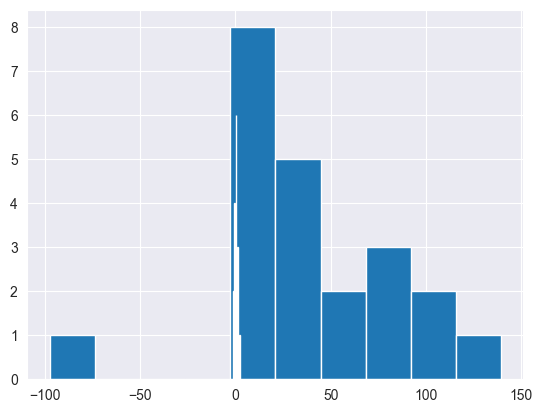

In [54]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

pyplot.hist(X_train[0], bins=10)

power = PowerTransformer(method='yeo-johnson', standardize=True) 
X_pt = power.fit_transform(X_train)

pyplot.hist(X_pt[0], bins=10) 

(array([1., 3., 4., 0., 7., 4., 2., 0., 0., 1.]),
 array([-1.52955819, -1.15861239, -0.78766659, -0.41672079, -0.04577499,
         0.32517081,  0.69611661,  1.06706241,  1.43800821,  1.80895401,
         2.17989981]),
 <BarContainer object of 10 artists>)

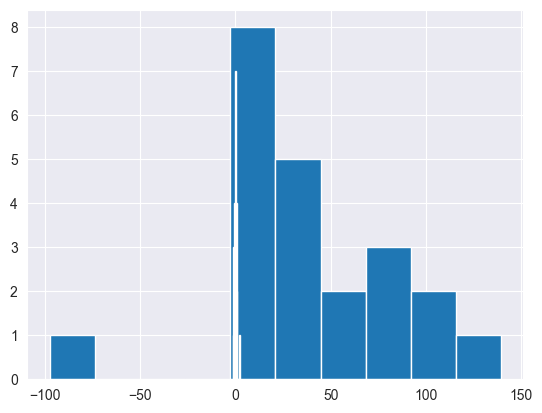

In [55]:
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

pyplot.hist(X_train[0], bins=10)

power = QuantileTransformer(output_distribution='normal', random_state=42)
X_qt = power.fit_transform(X_train)

pyplot.hist(X_qt[0], bins=10)

## 2.2 A

### Корреляционный анализ (линейная связь)

In [74]:
X_qt_df = pd.DataFrame(X_qt, columns=x_1.columns)
df_corr = X_qt_df.copy()
df_corr["oximetry"] = y_train

corr_matrix = df_corr.corr(numeric_only=True)

corr_sorted = corr_matrix["oximetry"].reindex(
    corr_matrix["oximetry"].abs().sort_values(ascending=False).index
)
corr_sorted

oximetry                 1.000000
PVI                      0.642734
Skin Temperature         0.372155
EtCO₂                    0.270198
SpO₂                    -0.132310
PI                      -0.112210
Motion/Activity index    0.031508
CO                       0.016163
HR                       0.015967
SNR                      0.015428
PRV                     -0.014076
FiO₂                     0.012685
SV                      -0.012292
RR                      -0.010047
PPG waveform features    0.007412
longitude               -0.007313
O₂ extraction ratio      0.006902
Hb level                 0.004157
Respiratory effort      -0.003094
Blood Flow Index         0.001830
Signal Quality Index     0.001720
BP                      -0.001159
latitude                 0.000247
Name: oximetry, dtype: float64

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


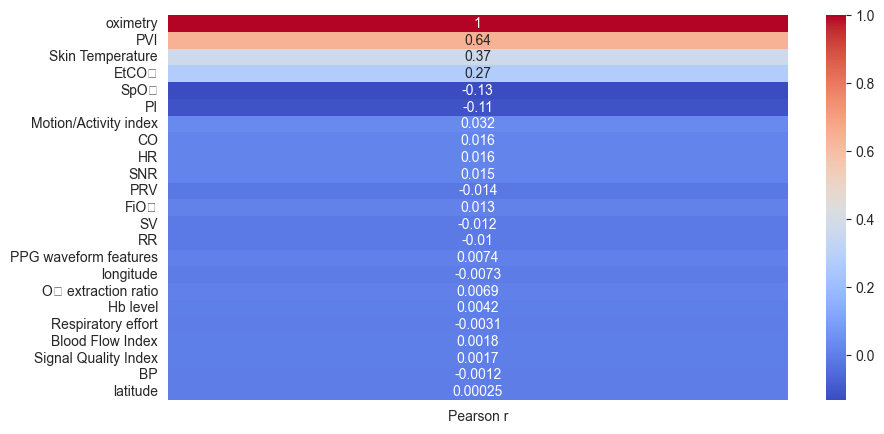

In [81]:
plt.figure(figsize=(10,5))
# sns.heatmap(corr_sorted, annot=True, cmap='coolwarm')
sns.heatmap(corr_sorted.to_frame(name="Pearson r"), annot=True, cmap="coolwarm")
plt.show()

### ANOVA F-test (feature selection test)

In [88]:
from sklearn.feature_selection import SelectKBest, f_regression

X = pd.DataFrame(X_qt, columns=x_1.columns) 
y = y_train 

selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

idx = selector.get_support(indices=True)
selected_features = X.columns[idx]

anova_results = pd.DataFrame({
    'Feature': selected_features,
    'F_value': selector.scores_[idx],
    'p_value': selector.pvalues_[idx]
}).sort_values(by='F_value', ascending=False).reset_index(drop=True)

print("Shape после отбора:", X_new.shape)
print("Выбранные признаки:", list(selected_features))
print(anova_results)

Shape после отбора: (9664, 22)
Выбранные признаки: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'latitude', 'longitude']
                  Feature      F_value        p_value
0                     PVI  6800.983053   0.000000e+00
1        Skin Temperature  1553.309465  3.622640e-315
2                   EtCO₂   760.945030  2.655408e-161
3                    SpO₂   172.156881   5.383525e-39
4                      PI   123.206404   1.866894e-28
5   Motion/Activity index     9.601272   1.950008e-03
6                      CO     2.524714   1.121078e-01
7                      HR     2.463959   1.165176e-01
8                     SNR     2.300290   1.293826e-01
9                     PRV     1.914709   1.664730e-01
10                   FiO₂     1.554942   2.124376e-01
11                    

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


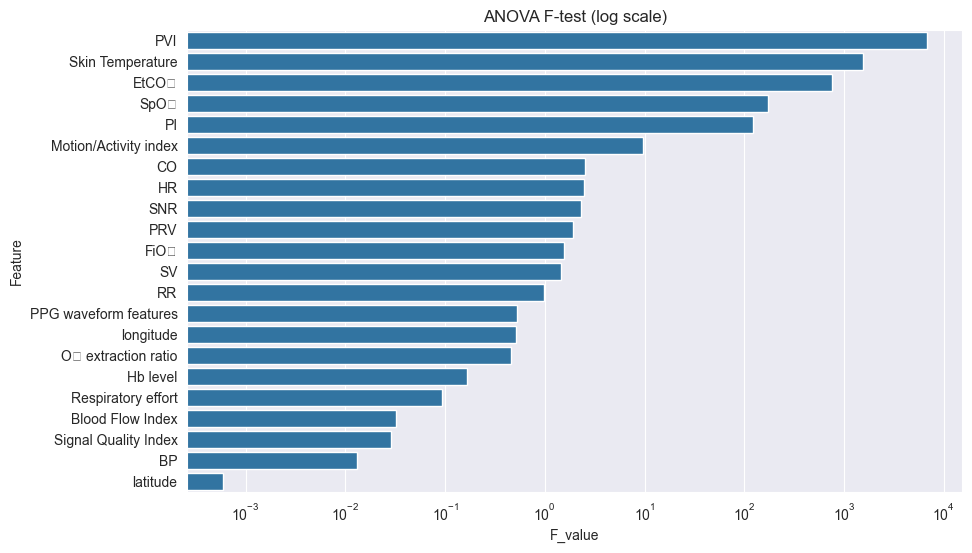

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(data=anova_results, x='F_value', y='Feature')
plt.xscale('log')
plt.title('ANOVA F-test (log scale)')
plt.show()

### Mutual Information (нелинейная зависимость)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


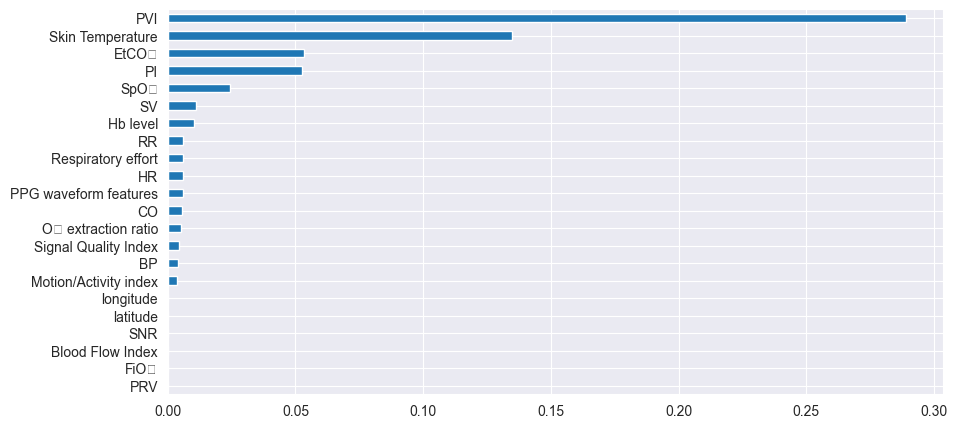

PVI                      0.288991
Skin Temperature         0.134827
EtCO₂                    0.053406
PI                       0.052582
SpO₂                     0.024442
SV                       0.011176
Hb level                 0.010095
RR                       0.006152
Respiratory effort       0.005998
HR                       0.005995
PPG waveform features    0.005812
CO                       0.005423
O₂ extraction ratio      0.005206
Signal Quality Index     0.004224
BP                       0.003834
Motion/Activity index    0.003454
longitude                0.000000
latitude                 0.000000
FiO₂                     0.000000
PRV                      0.000000
SNR                      0.000000
Blood Flow Index         0.000000
dtype: float64


In [94]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

X = pd.DataFrame(X_qt, columns=x_1.columns) 
y = y_train 

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

scores = pd.Series(abs(selector.scores_), index=X.columns).sort_values()

plt.figure(figsize=(10,5))
scores.plot(kind='barh')
plt.show()

print(scores.sort_values(ascending=False))

In [109]:
corr_part = (corr_sorted.drop(labels=['oximetry'], errors='ignore').abs().rename('Pearson_|r|'))
anova_part = (anova_results.set_index('Feature')['F_value'].rename('ANOVA_F'))
mi_part = scores.rename('Mutual_Info')

all_idx = corr_part.index.union(anova_part.index).union(mi_part.index)

compare_simple = pd.concat([corr_part, anova_part, mi_part], axis=1).reindex(all_idx).drop(index='oximetry', errors='ignore')
display(compare_simple.sort_values('Pearson_|r|', ascending=False))


def safe_minmax(series):
    s_min, s_max = series.min(), series.max()
    if s_max == s_min:
        return pd.Series(0.0, index=series.index)
    return (series - s_min) / (s_max - s_min)

norm = compare_simple.apply(safe_minmax, axis=0)

norm['Mean_Score'] = norm.mean(axis=1)

final_display = norm.sort_values('Mean_Score', ascending=False)

final_display.style.format('{:.6f}')

,Pearson_|r|,ANOVA_F,Mutual_Info
PVI,0.642734,6800.983053,0.288991
Skin Temperature,0.372155,1553.309465,0.134827
EtCO₂,0.270198,760.945030,0.053406
SpO₂,0.132310,172.156881,0.024442
PI,0.112210,123.206404,0.052582
Motion/Activity index,0.031508,9.601272,0.003454
CO,0.016163,2.524714,0.005423
HR,0.015967,2.463959,0.005995
SNR,0.015428,2.300290,0.000000
PRV,0.014076,1.914709,0.000000


,Pearson_|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.578856,0.228395,0.466543,0.424598
EtCO₂,0.420165,0.111887,0.184801,0.238951
PI,0.174265,0.018116,0.181950,0.124777
SpO₂,0.205550,0.025313,0.084576,0.105147
Motion/Activity index,0.048656,0.001412,0.011954,0.020674
SV,0.018749,0.000215,0.038672,0.019212
HR,0.024468,0.000362,0.020744,0.015191
CO,0.024773,0.000371,0.018765,0.014636
Hb level,0.006086,0.000024,0.034933,0.013681


## 2.2 B

,Pearson_|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.578856,0.228395,0.466543,0.424598
EtCO₂,0.420165,0.111887,0.184801,0.238951
PI,0.174265,0.018116,0.181950,0.124777
SpO₂,0.205550,0.025313,0.084576,0.105147


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


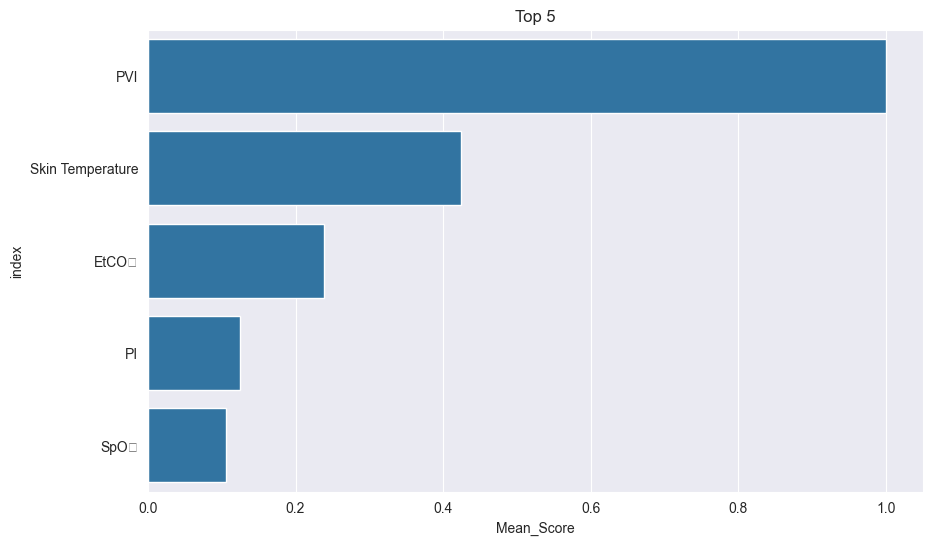

In [118]:
ranked_features = final_display.sort_values('Mean_Score', ascending=False).head(5).copy()
display(ranked_features.style.format('{:.6f}'))

topk = (final_display.reset_index().head(5))

plt.figure(figsize=(10,6))
sns.barplot(data=topk, x='Mean_Score', y='index')
plt.title('Top 5')
plt.show()

## 2.2 C
### (C-1b) Zdôvodnenie rozhodnutí pri realizácii

Pri realizácii úlohy som sa rozhodol využiť tri komplementárne prístupy na hodnotenie informatívnosti atribútov:
**Pearsonova korelácia**, **ANOVA F-test** a **Mutual Information**.  
Tieto techniky reprezentujú tri rôzne pohľady na vzťah medzi vstupnými premennými a cieľovou premennou *oximetry*:

- **Pearsonova korelácia** umožňuje zachytiť **lineárnu závislosť** medzi atribútom a cieľovou premennou.
- **ANOVA F-test** zisťuje, či existujú **štatisticky významné rozdiely v priemeroch** medzi skupinami hodnôt a hodnotí lineárnu relevantnosť premenných.
- **Mutual Information** je **nelineárna metóda**, ktorá kvantifikuje množstvo informácie, ktorú jeden atribút poskytuje o inom, a teda odhaľuje aj zložitejšie vzťahy.

Výber týchto troch metód umožnil porovnať lineárne aj nelineárne súvislosti a získať
robustnejší prehľad o dôležitosti atribútov.

Všetky výsledky boli následne **normalizované pomocou min–max transformácie** do intervalu ⟨0, 1⟩,  
aby bolo možné spravodlivo porovnávať hodnoty z rôznych metód, ktoré majú odlišné jednotky a rozsahy.
Z týchto normalizovaných hodnôt bol vypočítaný **priemerný index informatívnosti (Mean Score)**,
ktorý vyjadruje celkovú dôležitosť atribútu naprieč metódami.

Týmto postupom bolo zabezpečené:
- porovnateľnosť výsledkov z rôznych štatistických metód,
- odstránenie vplyvu rozdielnych mierok hodnôt (napr. F-hodnoty vs. korelácia),
- transparentný a reprodukovateľný spôsob zoradenia atribútov podľa dôležitosti.

Takto spracované výsledky umožňujú jednoznačne určiť,
ktoré atribúty majú najväčší vplyv na predikciu *oximetry*
a sú vhodné pre ďalšiu tvorbu predikčných modelov.
